# Basic useage examples


In the following, usage of pycombina for solving binary approximation problems is exemplified.


## Combinatorial integral approximation

A binary approximation problem for a sample data set shall be solved using combinatorial integral approximation. The setup includes ``n_c = 3`` mutually exclusive binary controls with each ``n_b = 149`` values.

The first column of the file ``sample_data.csv`` contains the time points, the other columns contain the relaxed binary values.

In [1]:
import numpy as np

data = np.loadtxt("sample_data_1.csv", skiprows = 1)

t = data[:,0]
b_rel = data[:-1,1:]

In the following, the data set is visualized.

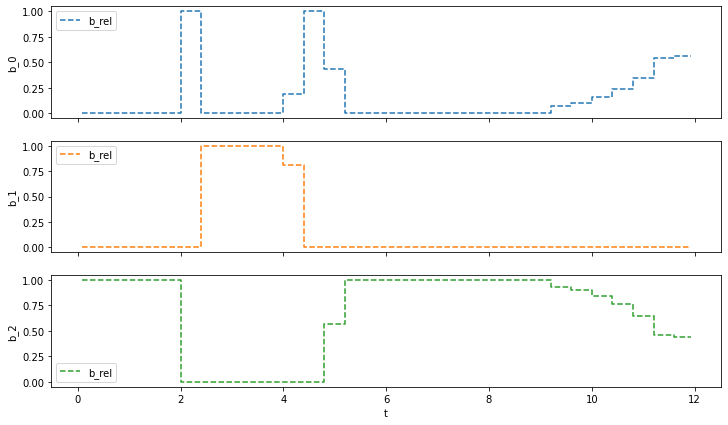

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

f, (ax1, ax2, ax3) = plt.subplots(3, sharex = True, figsize = (12,7))
ax1.step(t[:-1], b_rel[:,0], label = "b_rel", color = "C0", linestyle="dashed", where = "post")
ax1.set_ylabel("b_0")
ax1.legend(loc = "upper left")
ax2.step(t[:-1], b_rel[:,1], label = "b_rel",  color = "C1", linestyle="dashed", where = "post")
ax2.set_ylabel("b_1")
ax2.legend(loc = "upper left")
ax3.step(t[:-1], b_rel[:,2], label = "b_rel",  color = "C2", linestyle="dashed", where = "post")
ax3.set_ylabel("b_2")
ax3.legend(loc = "lower left")
ax3.set_xlabel("t")
plt.show()

First, we instantiate an object of the class ``pycombina.BinApprox`` to formulate the binary approximation problem, and check the problem dimensions.

In [3]:
from pycombina import BinApprox

binapprox = BinApprox(t, b_rel)

assert(binapprox.n_c == 3)
assert(binapprox.n_t == t.size-1)

From the data shown above, it seems reasonable to set a maximum switching constraint for the controls.

In [4]:
binapprox.set_n_max_switches(n_max_switches = [5, 2, 3])

For solution of the problem, we choose combinatorial integral approximation using the Branch-and-Bound method in ``pycombina.CombinaBnB``.

In [5]:
from pycombina import CombinaBnB

combina = CombinaBnB(binapprox)
combina.solve()

Running Branch and Bound ... 

    Iteration   Upper bound    Branches     Runtime (s)    
 U         62   6.146028e+00          116   4.380000e-04
 U         64   6.066028e+00          116   1.169000e-03
 U         66   5.986028e+00          116   1.192000e-03
 U         68   5.906028e+00          116   1.213000e-03
 U         70   5.826028e+00          116   1.233000e-03
 U         72   5.746028e+00          116   1.250000e-03
 U         74   5.666028e+00          116   1.268000e-03
 U         76   5.586028e+00          116   1.285000e-03
 U         78   5.506028e+00          116   1.301000e-03
 U         80   5.426028e+00          116   1.321000e-03
    Iteration   Upper bound    Branches     Runtime (s)    
 U         82   5.346028e+00          116   1.339000e-03
 U         84   5.266028e+00          116   1.366000e-03
 U         86   5.186028e+00          116   1.384000e-03
 U         88   5.106028e+00          116   1.401000e-03
 U         90   5.026028e+00          116   1.41800

The solution times shown above have been achieved on an Intel Core i5-4570 3.20 GHz CPU.

In the following, we can retrieve and inspect the obtained binary solution and the corresponding objective value.

In [6]:
eta = binapprox.eta
b_bin = binapprox.b_bin

print("Objective value:", eta)

Objective value: 0.2168071999999996


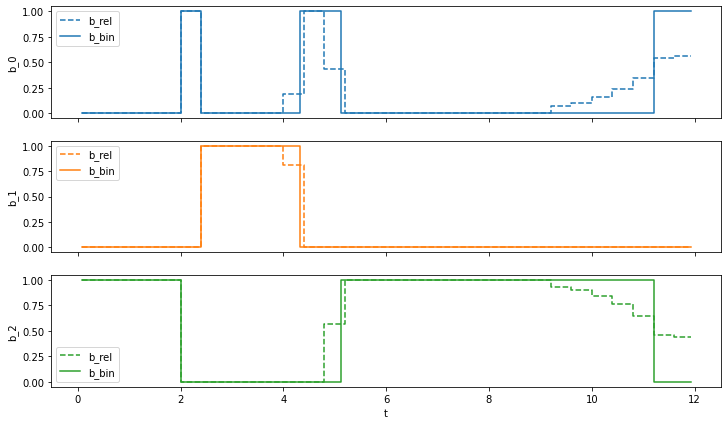

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex = True, figsize = (12,7))
ax1.step(t[:-1], b_rel[:,0], label = "b_rel", color = "C0", linestyle="dashed", where = "post")
ax1.step(t[:-1], b_bin[0,:], label = "b_bin", color = "C0", where = "post")
ax1.legend(loc = "upper left")
ax1.set_ylabel("b_0")
ax2.step(t[:-1], b_rel[:,1], label = "b_rel", color = "C1", linestyle="dashed", where = "post")
ax2.step(t[:-1], b_bin[1,:], label = "b_bin", color = "C1", where = "post")
ax2.legend(loc = "upper left")
ax2.set_ylabel("b_1")
ax3.step(t[:-1], b_rel[:,2], label = "b_rel", color = "C2", linestyle="dashed", where = "post")
ax3.step(t[:-1], b_bin[2,:], label = "b_bin", color = "C2", where = "post")
ax3.legend(loc = "lower left")
ax3.set_ylabel("b_2")
ax3.set_xlabel("t")
plt.show()

## Sum up rounding

... tbd